In [4]:
# Import required libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

# Load the NBA dataset into a Pandas dataframe
nba_df = pd.read_csv('all_seasons.csv')
nba_df

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Travis Knight,LAL,22.0,213.36,106.594120,Connecticut,USA,1996,1,...,4.8,4.5,0.5,6.2,0.127,0.182,0.142,0.536,0.052,1996-97
1,1,Matt Fish,MIA,27.0,210.82,106.594120,North Carolina-Wilmington,USA,1992,2,...,0.3,0.8,0.0,-15.1,0.143,0.267,0.265,0.333,0.000,1996-97
2,2,Matt Bullard,HOU,30.0,208.28,106.594120,Iowa,USA,Undrafted,Undrafted,...,4.5,1.6,0.9,0.9,0.016,0.115,0.151,0.535,0.099,1996-97
3,3,Marty Conlon,BOS,29.0,210.82,111.130040,Providence,USA,Undrafted,Undrafted,...,7.8,4.4,1.4,-9.0,0.083,0.152,0.167,0.542,0.101,1996-97
4,4,Martin Muursepp,DAL,22.0,205.74,106.594120,None,USA,1996,1,...,3.7,1.6,0.5,-14.5,0.109,0.118,0.233,0.482,0.114,1996-97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11695,11695,Matthew Dellavedova,CLE,30.0,190.50,90.718400,St.Mary's College of California,Australia,Undrafted,Undrafted,...,2.8,1.8,4.5,-3.1,0.029,0.085,0.125,0.312,0.337,2020-21
11696,11696,Maurice Harkless,SAC,28.0,200.66,99.790240,St. John's,USA,2012,1,...,5.2,2.4,1.2,-2.9,0.017,0.097,0.114,0.527,0.071,2020-21
11697,11697,Max Strus,MIA,25.0,195.58,97.522280,DePaul,USA,Undrafted,Undrafted,...,6.1,1.1,0.6,-4.2,0.011,0.073,0.179,0.597,0.074,2020-21
11698,11698,Marcus Morris Sr.,LAC,31.0,203.20,98.883056,Kansas,USA,2011,1,...,13.4,4.1,1.0,4.2,0.025,0.133,0.194,0.614,0.056,2020-21


In [20]:
# Encode 'undrafted' values in draft_round and draft_pick columns as a separate category
nba_df['draft_round'] = nba_df['draft_round'].apply(lambda x: 'undrafted' if x == 'undrafted' else 'drafted')
nba_df['draft_number'] = nba_df['draft_number'].apply(lambda x: 'undrafted' if x == 'undrafted' else 'drafted')

# Extract the features we want to use for PCA and standardize the data
X = nba_df[['player_height', 'player_weight', 'draft_round', 'draft_number',
            'net_rating', 'oreb_pct', 'dreb_pct', 'usg_pct',
            'ts_pct', 'ast_pct', 'college', 'team_abbreviation', 'country', 'draft_year']]

# Encode categorical variables using label encoding
le = LabelEncoder()
X['draft_round'] = le.fit_transform(X['draft_round'])
X['draft_number'] = le.fit_transform(X['draft_number'])
X['college'] = le.fit_transform(X['college'].astype(str))
X['team_abbreviation'] = le.fit_transform(X['team_abbreviation'].astype(str))
X['country'] = le.fit_transform(X['country'].astype(str))
X['draft_year'] = le.fit_transform(X['draft_year'].astype(str))

# Standardize numerical variables
numerical_cols = ['player_height', 'player_weight', 'net_rating', 'oreb_pct', 
                  'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct']
X[numerical_cols] = StandardScaler().fit_transform(X[numerical_cols])

# Perform PCA
pca = PCA(n_components=10)
principal_components = pca.fit_transform(X)

# Look at the explained variance of each principal component
explained_variance = pca.explained_variance_ratio_
print("Explained variance: ", explained_variance)

# Identify the top factors
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 
                                                    'PC6', 'PC7', 'PC8', 'PC9', 'PC10'], 
                        index=X.columns)
print("Loadings: \n", loadings)

# Get the top three factors
top_factors = loadings.abs().sum(axis=1).nlargest(3).index
print("Top three factors: ", top_factors)

Explained variance:  [9.39001847e-01 3.37639360e-02 1.37360003e-02 1.25169425e-02
 4.08007150e-04 1.71696908e-04 1.30281893e-04 8.44779455e-05
 6.92528014e-05 5.54509760e-05]
Loadings: 
                             PC1           PC2           PC3           PC4  \
player_height      2.422872e-04  9.739221e-03  1.058291e-02  1.216930e-02   
player_weight     -6.079035e-05  7.050466e-03  1.069572e-02  1.398520e-02   
draft_round       -0.000000e+00  0.000000e+00  1.665335e-16  5.551115e-17   
draft_number       3.469447e-18 -1.110223e-16  5.551115e-17 -1.110223e-16   
net_rating        -2.497597e-04  1.607177e-03  5.210001e-03  6.037620e-03   
oreb_pct           2.406156e-04  3.102156e-03  7.634503e-03  7.811359e-03   
dreb_pct           1.961302e-04  5.822009e-03  6.068892e-03  7.681798e-03   
usg_pct           -2.126279e-04 -6.868722e-04  6.323717e-03  7.091263e-03   
ts_pct            -5.517085e-05  3.758212e-03  1.430853e-03  3.973931e-04   
ast_pct            3.869258e-05 -2.393016e-

/var/folders/vc/n_yds3910sl4wrt0y_5zyh7h0000gn/T/ipykernel_1700/1940334309.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['draft_round'] = le.fit_transform(X['draft_round'])
/var/folders/vc/n_yds3910sl4wrt0y_5zyh7h0000gn/T/ipykernel_1700/1940334309.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['draft_number'] = le.fit_transform(X['draft_number'])
/var/folders/vc/n_yds3910sl4wrt0y_5zyh7h0000gn/T/ipykernel_1700/1940334309.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy o

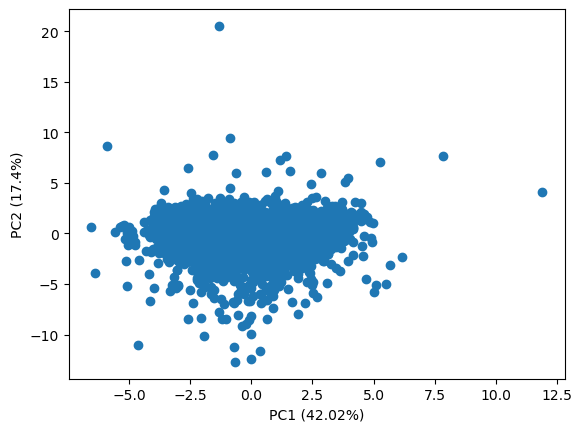

In [8]:
# Create a scatter plot to visualize the first two principal components
import matplotlib.pyplot as plt
plt.scatter(principal_components[:, 0], principal_components[:, 1])
plt.xlabel('PC1 ({}%)'.format(round(explained_variance[0]*100, 2)))
plt.ylabel('PC2 ({}%)'.format(round(explained_variance[1]*100, 2)))
plt.show()

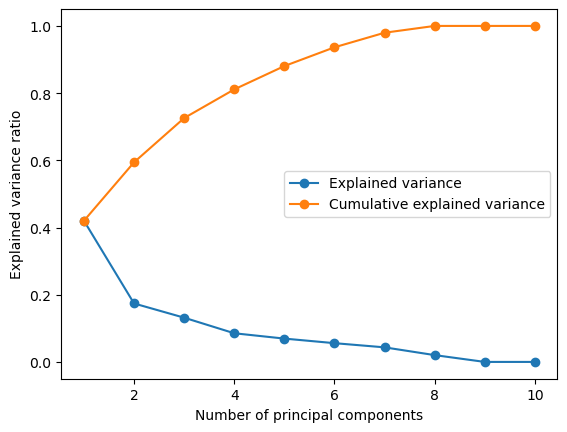

In [10]:
# Create a scree plot to visualize the explained variance of each principal component
n_components = len(explained_variance)
plt.plot(range(1, n_components + 1), explained_variance, 'o-', label='Explained variance')
plt.plot(range(1, n_components + 1), explained_variance.cumsum(), 'o-', label='Cumulative explained variance')
plt.xlabel('Number of principal components')
plt.ylabel('Explained variance ratio')
plt.legend()
plt.show()


In [18]:
# Encode 'undrafted' values in draft_round and draft_pick columns as a separate category
nba_df['draft_round'] = nba_df['draft_round'].apply(lambda x: 'undrafted' if x == 'undrafted' else 'drafted')
nba_df['draft_number'] = nba_df['draft_number'].apply(lambda x: 'undrafted' if x == 'undrafted' else 'drafted')

# Extract the features we want to use for PCA and standardize the data
X = nba_df[['player_height', 'player_weight', 'draft_round', 'draft_number',
            'net_rating', 'oreb_pct', 'dreb_pct', 'usg_pct',
            'ts_pct', 'ast_pct', 'college', 'team_abbreviation', 'country', 'draft_year']]

# Encode categorical variables using label encoding
le = LabelEncoder()
X['draft_round'] = le.fit_transform(X['draft_round'])
X['draft_number'] = le.fit_transform(X['draft_number'])
X['college'] = le.fit_transform(X['college'].astype(str))
X['team_abbreviation'] = le.fit_transform(X['team_abbreviation'].astype(str))
X['country'] = le.fit_transform(X['country'].astype(str))
X['draft_year'] = le.fit_transform(X['draft_year'].astype(str))

# Standardize numerical variables
numerical_cols = ['player_height', 'player_weight', 'net_rating', 'oreb_pct', 
                  'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct', 'draft_year']
X[numerical_cols] = StandardScaler().fit_transform(X[numerical_cols])

# Perform PCA
pca = PCA(n_components=14)
principal_components = pca.fit_transform(X)

# Look at the explained variance of each principal component
explained_variance = pca.explained_variance_ratio_
print("Explained variance: ", explained_variance)

# Identify the top factors
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 
                                                    'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 
                                                    'PC11', 'PC12', 'PC13', 'PC14'], 
                        index=X.columns)
print("Loadings: \n", loadings)

# Get the top three factors
top_factors = loadings.abs().sum(axis=1).nlargest(3).index
print("Top three factors: ", top_factors)


Explained variance:  [9.51508191e-01 3.39848287e-02 1.33766756e-02 4.21782437e-04
 1.79972386e-04 1.41336961e-04 1.15002369e-04 8.37305988e-05
 6.99745077e-05 5.61638468e-05 4.20605263e-05 2.02809505e-05
 5.54628406e-35 3.68028587e-37]
Loadings: 
                             PC1           PC2           PC3           PC4  \
player_height      2.435267e-04  1.039913e-02  5.344306e-04  4.894382e-01   
player_weight     -5.935722e-05  7.761548e-03 -4.970728e-04  4.821124e-01   
draft_round       -0.000000e+00  5.551115e-16 -3.469447e-18 -4.440892e-16   
draft_number      -3.469447e-18 -5.551115e-17  3.469447e-18 -1.110223e-16   
net_rating        -2.490622e-04  1.931503e-03  2.550465e-04  1.181548e-02   
oreb_pct           2.415440e-04  3.544417e-03  1.027614e-03  4.263274e-01   
dreb_pct           1.968731e-04  6.217880e-03 -1.320748e-04  4.111061e-01   
usg_pct           -2.117217e-04 -3.021353e-04  4.774984e-04 -1.094723e-01   
ts_pct            -5.515703e-05  3.814256e-03  8.385489e-04

/var/folders/vc/n_yds3910sl4wrt0y_5zyh7h0000gn/T/ipykernel_1700/3683507.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['draft_round'] = le.fit_transform(X['draft_round'])
/var/folders/vc/n_yds3910sl4wrt0y_5zyh7h0000gn/T/ipykernel_1700/3683507.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['draft_number'] = le.fit_transform(X['draft_number'])
/var/folders/vc/n_yds3910sl4wrt0y_5zyh7h0000gn/T/ipykernel_1700/3683507.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

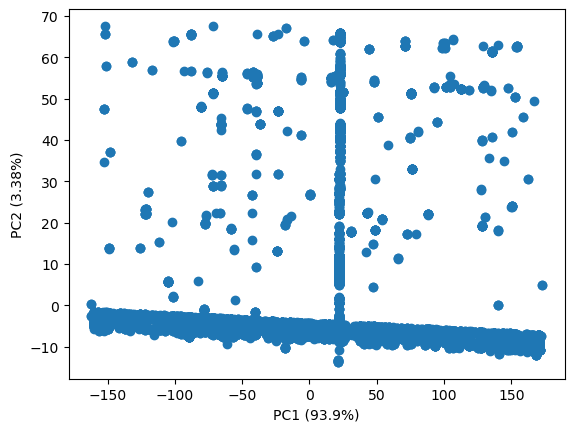

In [21]:
# Create a scatter plot to visualize the first two principal components
import matplotlib.pyplot as plt
plt.scatter(principal_components[:, 0], principal_components[:, 1])
plt.xlabel('PC1 ({}%)'.format(round(explained_variance[0]*100, 2)))
plt.ylabel('PC2 ({}%)'.format(round(explained_variance[1]*100, 2)))
plt.show()

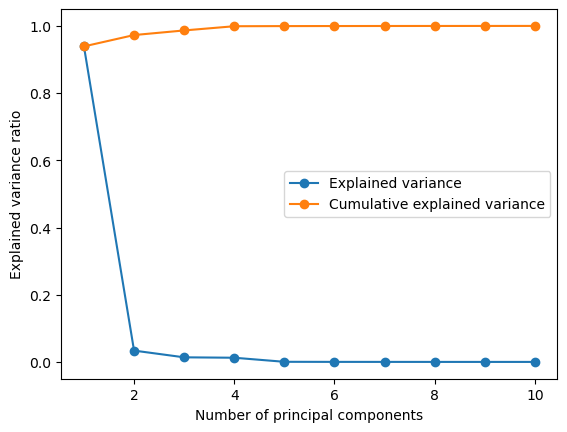

In [22]:
# Create a scree plot to visualize the explained variance of each principal component
n_components = len(explained_variance)
plt.plot(range(1, n_components + 1), explained_variance, 'o-', label='Explained variance')
plt.plot(range(1, n_components + 1), explained_variance.cumsum(), 'o-', label='Cumulative explained variance')
plt.xlabel('Number of principal components')
plt.ylabel('Explained variance ratio')
plt.legend()
plt.show()


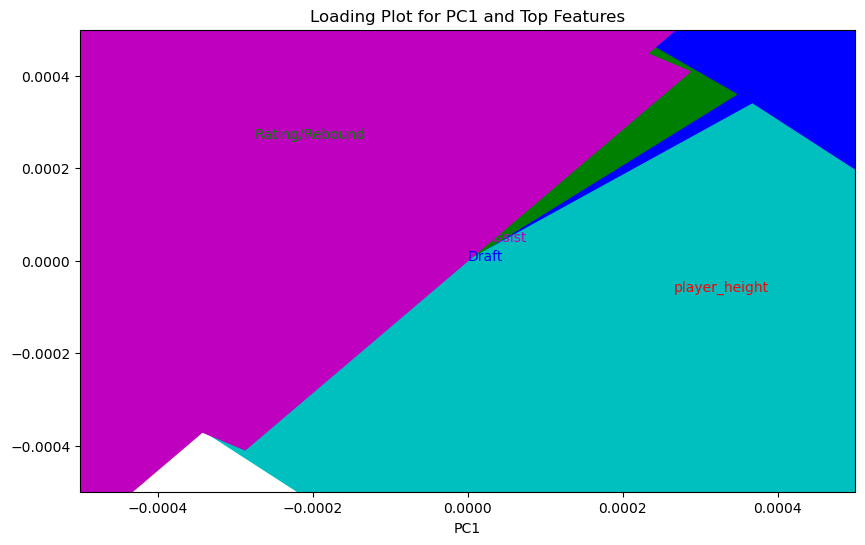

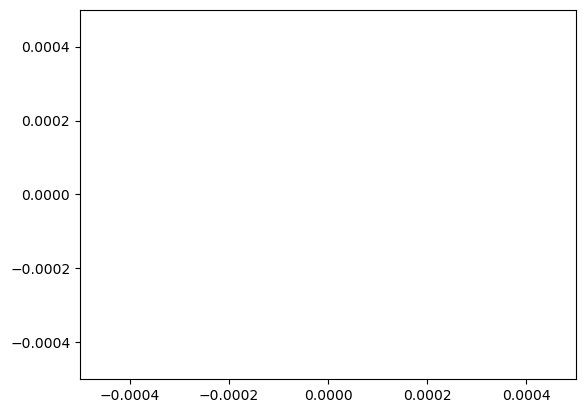

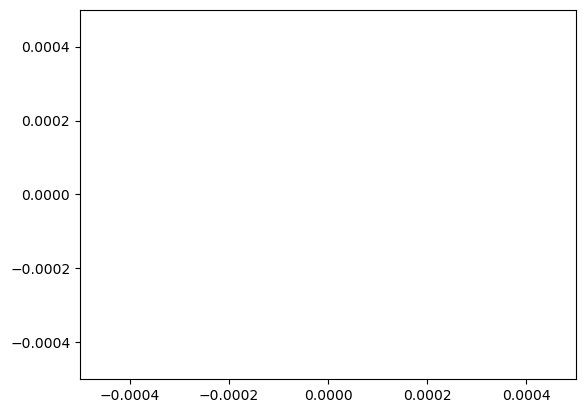

In [28]:
# Create a loading plot
fig, ax = plt.subplots(figsize=(10,6))

# Plot the loadings for the first three principal components
for i, column in enumerate(loadings.columns[:3]):
    ax.arrow(0, 0, loadings.loc['player_height', column], loadings.loc['player_weight', column], 
             head_width=0.1, head_length=0.1, fc='r', ec='r')
    ax.text(loadings.loc['player_height', column]*1.1, loadings.loc['player_weight', column]*1.1, 
            X.columns[0], color='r')
    ax.arrow(0, 0, loadings.loc['draft_round', column], loadings.loc['draft_number', column], 
             head_width=0.1, head_length=0.1, fc='b', ec='b')
    ax.text(loadings.loc['draft_round', column]*1.1, loadings.loc['draft_number', column]*1.1, 
            'Draft', color='b')
    ax.arrow(0, 0, loadings.loc['net_rating', column], loadings.loc['oreb_pct', column], 
             head_width=0.1, head_length=0.1, fc='g', ec='g')
    ax.text(loadings.loc['net_rating', column]*1.1, loadings.loc['oreb_pct', column]*1.1, 
            'Rating/Rebound', color='g')
    ax.arrow(0, 0, loadings.loc['dreb_pct', column], loadings.loc['usg_pct', column], 
             head_width=0.1, head_length=0.1, fc='c', ec='c')
    ax.text(loadings.loc['dreb_pct', column]*1.1, loadings.loc['usg_pct', column]*1.1, 
            'Defense/Usage', color='c')
    ax.arrow(0, 0, loadings.loc['ts_pct', column], loadings.loc['ast_pct', column], 
             head_width=0.1, head_length=0.1, fc='m', ec='m')
    ax.text(loadings.loc['ts_pct', column]*1.1, loadings.loc['ast_pct', column]*1.1, 
            'Shooting/Assist', color='m')

    # Set limits for the plot
    plt.xlim(-0.0005, 0.0005)
    plt.ylim(-0.0005, 0.0005)

    # Add labels for each axis
    ax.set_xlabel('PC{}'.format(i+1))
    ax.set_ylabel('')

    # Add a title
    ax.set_title('Loading Plot for PC{} and Top Features'.format(i+1))

    plt.show()


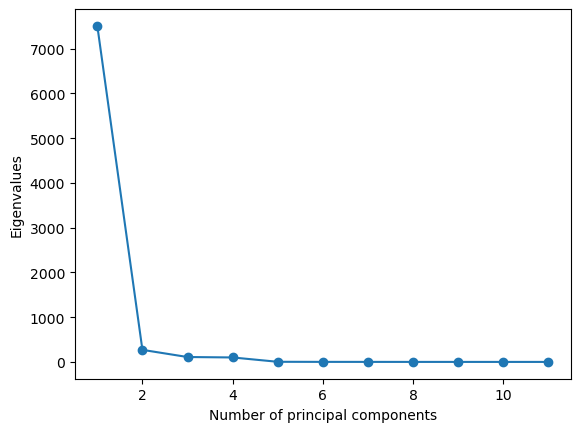

In [29]:
# Perform PCA
pca = PCA(n_components=11)
principal_components = pca.fit_transform(X)

# Get eigenvalues
eigenvalues = pca.explained_variance_

# Create a scree plot to visualize eigenvalues of each principal component
plt.plot(range(1, 12), eigenvalues, 'o-')
plt.xlabel('Number of principal components')
plt.ylabel('Eigenvalues')
plt.show()
